# 🩺 Predicting stress using machine learning

Sami HADHRI Mondher HADIJI Walid LABIDI



# 📑 Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether it is stressed or not?

# 💾 **Create data dictionary**

1. `spo2` - Oxygen Saturation - integer
2. `bpm` - Heart Rate or Beats Per Minute
3. `sweat` - Electrodermal Activity (EDA) or Galvanic Skin Response
4. `status` - stressed or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.1 MB/s 


In [2]:
#!pip install -q hvplot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Output hidden; open in https://colab.research.google.com to view.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Enseignement/ISET/Articles/Article 3/Code/stress3.csv")
data.head()

,spo2,bpm,sweat,status
0,91,96,308,0
1,95,99,360,1
2,93,102,245,2
3,95,89,215,2
4,89,99,324,2


# 🔍 Exploratory Data Analysis (EDA)

📌 **The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.** 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spo2    1403 non-null   int64
 1   bpm     1403 non-null   int64
 2   sweat   1403 non-null   int64
 3   status  1403 non-null   int64
dtypes: int64(4)
memory usage: 44.0 KB


In [7]:
data.shape

(1403, 4)

In [8]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,spo2,bpm,sweat,status
count,1403.00,1403.00,1403.00,1403.00
mean,91.43,93.84,285.15,1.04
std,5.94,24.31,67.84,0.85
min,47.00,31.00,100.00,0.00
25%,90.00,78.00,242.00,0.00
50%,93.00,90.00,283.00,1.00
75%,95.00,105.00,326.00,2.00
max,100.00,255.00,570.00,2.00


In [9]:
data.status.value_counts()

2    537
0    478
1    388
Name: status, dtype: int64

In [10]:
# Checking for messing values
data.isna().sum()

spo2      0
bpm       0
sweat     0
status    0
dtype: int64

### 📌 Notes:
> - We have `576`  stressed person and `477` non stressed person.
> - Looks like the perfect dataset!!! No null values :-)

In [11]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [12]:
categorical_val

['status']

### 📌 Notes:

> - `cp` {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
> - `restecg` {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
> - `exang` {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
> - `slope` {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
> - `ca` {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
> - `thal` {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

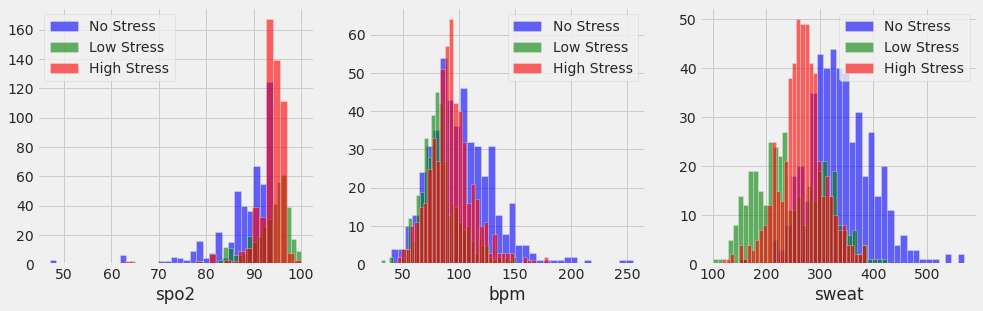

In [13]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["status"] == 0][column].hist(bins=35, color='blue', label='No Stress', alpha=0.6)
    data[data["status"] == 1][column].hist(bins=35, color='green', label='Low Stress', alpha=0.6)
    data[data["status"] == 2][column].hist(bins=35, color='red', label='High Stress', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### 📌 Notes:
> - `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
> - `chol` {serum cholestoral in mg/dl} : above 200 is cause for concern.
> - `thalach` {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
> - `oldpeak` ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

# 🔄 Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [16]:
#categorical_val.remove('target')
#dataset = pd.get_dummies(data, columns = categorical_val)

In [17]:
dataset=data
dataset.head()

,spo2,bpm,sweat,status
0,91,96,308,0
1,95,99,360,1
2,93,102,245,2
3,95,89,215,2
4,89,99,324,2


In [18]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['spo2', 'bpm', 'sweat']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [19]:
dataset.head()

,spo2,bpm,sweat,status
0,-0.07,0.09,0.34,0
1,0.60,0.21,1.10,1
2,0.26,0.34,-0.59,2
3,0.60,-0.20,-1.03,2
4,-0.41,0.21,0.57,2


# 🤖 Models Building

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def matrice(preds, y_test, title):
    cf_matrix = confusion_matrix(y_test, preds)
    print(cf_matrix)

    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    ax.set_title(title);
    ax.set_xlabel('\nPredicted class')
    ax.set_ylabel('Actual class');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['No\nStress','Low\nStress','High\nStress'])
    ax.yaxis.set_ticklabels(['No\nStress','Low\nStress','High\nStress'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [31]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score, matthews_corrcoef
from sklearn.metrics import classification_report

def print_score(preds, y_test):
    #clf_report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, preds) * 100:.2f}%")
    print(f"F1 Score: {f1_score(y_test, preds, average='macro') * 100:.2f}%")
    print(f"MCC Score: {matthews_corrcoef(y_test, preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, preds, average='macro') * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, preds, average='macro') * 100:.2f}%")
    #print("\nDetails:\n================================================")    
    #target_names = ['No Stress','Low Stress','High Stress']
    #print(classification_report(y_test, preds, target_names=target_names, digits=4))

In [22]:
from sklearn.model_selection import train_test_split

X = dataset.drop('status', axis=1)
y = dataset.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
> 1. Logistic Regression 
> 2. K-Nearest Neighbours Classifier
> 3. Support Vector machine
> 4. Decision Tree Classifier
> 5. Random Forest Classifier

## 1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print_score(lr_preds, y_test)

Test Result:
Accuracy Score: 68.33%
F1 Score: 65.88%
MCC Score: 51.96%
Precision: 67.92%
Recall: 66.16%


## 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_preds = knn_clf.predict(X_test)
print_score(knn_preds, y_test)

Test Result:
Accuracy Score: 70.46%
F1 Score: 70.63%
MCC Score: 55.82%
Precision: 72.20%
Recall: 70.46%


## 3. Support Vector machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0, probability=True)
svm_clf.fit(X_train, y_train)

svm_preds = svm_clf.predict(X_test)
print_score(svm_preds, y_test)

Test Result:
Accuracy Score: 70.11%
F1 Score: 68.59%
MCC Score: 55.20%
Precision: 71.80%
Recall: 70.11%


## 4. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

tree_preds = tree_clf.predict(X_test)
print_score(tree_preds, y_test)

Test Result:
Accuracy Score: 67.26%
F1 Score: 67.35%
MCC Score: 50.50%
Precision: 67.52%
Recall: 67.26%


## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_test)
print_score(rf_preds, y_test)

Test Result:
Accuracy Score: 75.80%
F1 Score: 75.87%
MCC Score: 63.57%
Precision: 76.70%
Recall: 75.80%


In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

#ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Decision Tree Holdout\n');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Stressed','No Stressed'])
ax.yaxis.set_ticklabels(['Stressed','No Stressed'])

## Display the visualization of the Confusion Matrix.
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n#ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')\nax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')\n\nax.set_title('Decision Tree Holdout\n');\nax.set_xlabel('\nPredicted class')\nax.set_ylabel('Actual class');\n\n## Ticket labels - List must be in alphabetical order\nax.xaxis.set_ticklabels(['Stressed','No Stressed'])\nax.yaxis.set_ticklabels(['Stressed','No Stressed'])\n\n## Display the visualization of the Confusion Matrix.\nplt.show()\n"

## Voting\Stacking Classification Example

In [ ]:
from sklearn.ensemble import VotingClassifier
hard_voting_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('SVM', svm_clf), ('DT', tree_clf), ('RF', rf_clf)], voting='hard')
hard_voting_clf.fit(X_train, y_train)
hard_preds = hard_voting_clf.predict(X_test)
print_score(hard_preds, y_test)

Test Result:
Accuracy Score: 74.02%
F1 Score: 73.92%
MCC Score: 61.33%
Precision: 76.11%
Recall: 74.02%


In [ ]:
from sklearn.ensemble import VotingClassifier
soft_voting_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf), ('SVM', svm_clf), ('DT', tree_clf), ('RF', rf_clf)], voting='soft', weights=[1,1,1,1,2])
soft_voting_clf.fit(X_train, y_train)
soft_preds = soft_voting_clf.predict(X_test)
print_score(hard_preds, y_test)

Test Result:
Accuracy Score: 74.02%
F1 Score: 73.92%
MCC Score: 61.33%
Precision: 76.11%
Recall: 74.02%


## Enregistrement des modèles

In [ ]:
import pickle
path= "/content/drive/MyDrive/Enseignement/ISET/Articles/Article 3/Code/Models/" 
LR_HOLDOUT_path = path+"LR_Holdout_model.pickle" 
KNN_HOLDOUT_path = path+"KNN_Holdout_model.pickle" 
SVM_HOLDOUT_path = path+"SVM_Holdout_model.pickle" 
TREE_HOLDOUT_path = path+"TREE_Holdout_model.pickle" 
RF_HOLDOUT_path = path+"RF_Holdout_model.pickle" 
HARD_VOTING_Holdout_path = path+"HARD_VOTING_Holdout_model.pickle" 
SOFT_VOTING_Holdout_path = path+"SOFT_VOTING_Holdout_model.pickle" 

# save models
pickle.dump(lr_clf, open(LR_HOLDOUT_path, "wb"))
pickle.dump(knn_clf, open(KNN_HOLDOUT_path, "wb"))
pickle.dump(svm_clf, open(SVM_HOLDOUT_path, "wb"))
pickle.dump(tree_clf, open(TREE_HOLDOUT_path, "wb"))
pickle.dump(rf_clf, open(RF_HOLDOUT_path, "wb"))
pickle.dump(hard_voting_clf, open(HARD_VOTING_Holdout_path, "wb"))
pickle.dump(soft_voting_clf, open(SOFT_VOTING_Holdout_path, "wb"))